<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Xareny González,  Estefanía Meza, Alejandra Rico

**Fecha:** 14 de octubre del 2021.

**Expediente** : 720811, 729930, 720838.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Proyecto TEMA 1

## Simulación en Predicción de Enfermedades Cardiacas

## Objetivos

### Objetivo General

> Predecir en qué circunstancias las personas tienden a desarrollar problemas de enfermedades cardiacas. 


### Objetivos Específicos

Encontrar la probabilidad de enfermedades cardiacas considerando los siguientes datos: 
* Age: edad del paciente [años]
* Sex: sexo del paciente [M: Masculino, F: Femenino]
* ChestPainType: tipo de dolor de pecho [TA: angina típica, ATA: angina atípica, NAP: dolor no anginal, ASY: asintomático]
* Resting BP: presión arterial en reposo [mm Hg]
* Cholesterol: colesterol sérico [mm / dl]
* Fasting BS: azúcar en sangre en ayunas [1: si BS en ayunas> 120 mg / dl, 0: en caso contrario]
* Resting ECG: resultados del electrocardiograma en reposo [Normal: Normal, ST: con anomalía de la onda ST-T (inversiones de la onda T y / o elevación o depresión del ST> 0,05 mV), HVI: que muestra una hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
* MaxHR: frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
* ExerciseAngina: angina inducida por el ejercicio [Y: Sí, N: No]
* Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
* ST_Slope: la pendiente del segmento ST del ejercicio pico [Up: uploping, Flat: flat, Down: downsloping]
* HeartDisease: clase de salida [1: enfermedad cardíaca, 0: normal]

Referencia: https://www.kaggle.com/fedesoriano/heart-failure-prediction

### 1.3 Definición del problema

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, cobrando un estimado de 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por las ECV y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca.

Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces donde un modelo de aprendizaje automático puede ser de gran ayuda.

Para el análisis de esta situación nos enfocaremos en las siguientes variables, las cuales consideramos son las más significativas y marcan una diferencia más generalizada en la población:
* Age
* Sex
* ChestPainType
* Cholesterol
* Resting BP
* MaxHR


In [5]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [22]:
fpath = "heart.csv"
df = pd.read_csv(fpath)

In [23]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [24]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=0)
y_train = x_train['HeartDisease']
x_train = x_train.drop(columns=['HeartDisease'])
y_test = x_test['HeartDisease']
x_test = x_test.drop(columns=['HeartDisease'])

In [25]:
rf = RandomForestClassifier(n_estimators=20, random_state=0, max_depth=5, max_features=5)
rf.fit(x_train.values, y_train.values)
rf.score(x_train.values, y_train.values)

0.9196185286103542

In [26]:
y_pred = rf.predict(x_test.values)
accuracy_score(y_test, y_pred)

0.8532608695652174

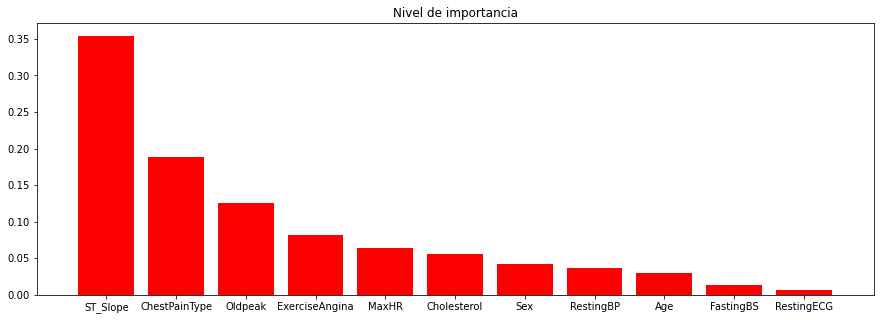

In [28]:
sel = SelectFromModel(rf)
sel.fit(x_train, y_train)
indices = np.argsort(sel.estimator_.feature_importances_)[::-1]
plt.figure(figsize=(15, 5))
plt.title('Nivel de importancia')
plt.bar(x_train.columns[indices], sel.estimator_.feature_importances_[indices], color='r', align='center')
plt.xlim([-1, x_train.shape[1]])
plt.show()